# 주식시장 분석 

- 2012-1-1 ~ 2021-12-31 기간의 Tesla, FORD, Apple 의 주가 등락, 변동성, 수익률 비교  


In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

## yfinance 를 이용한 주가 data 가져오기

In [3]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2022, 7, 31)

tesla_t = yf.Ticker('TSLA')   # Ticker : 해당 기업의 정보
tesla = tesla_t.history(start=start, end=end)
tesla = tesla[['Close', 'Volume']]
tesla.head()

,Close,Volume
Date,,
2012-01-03 00:00:00-05:00,1.872000,13921500
2012-01-04 00:00:00-05:00,1.847333,9451500
2012-01-05 00:00:00-05:00,1.808000,15082500
2012-01-06 00:00:00-05:00,1.794000,14794500
2012-01-09 00:00:00-05:00,1.816667,13455000


In [4]:
apple_t = yf.Ticker('AAPL')
apple = apple_t.history(start=start, end=end)
apple = apple[['Close', 'Volume']]

In [5]:
ford_t = yf.Ticker("F")
ford = ford_t.history(start=start, end=end)
ford = ford[['Close', 'Volume']]

## 주가 추이 시각화

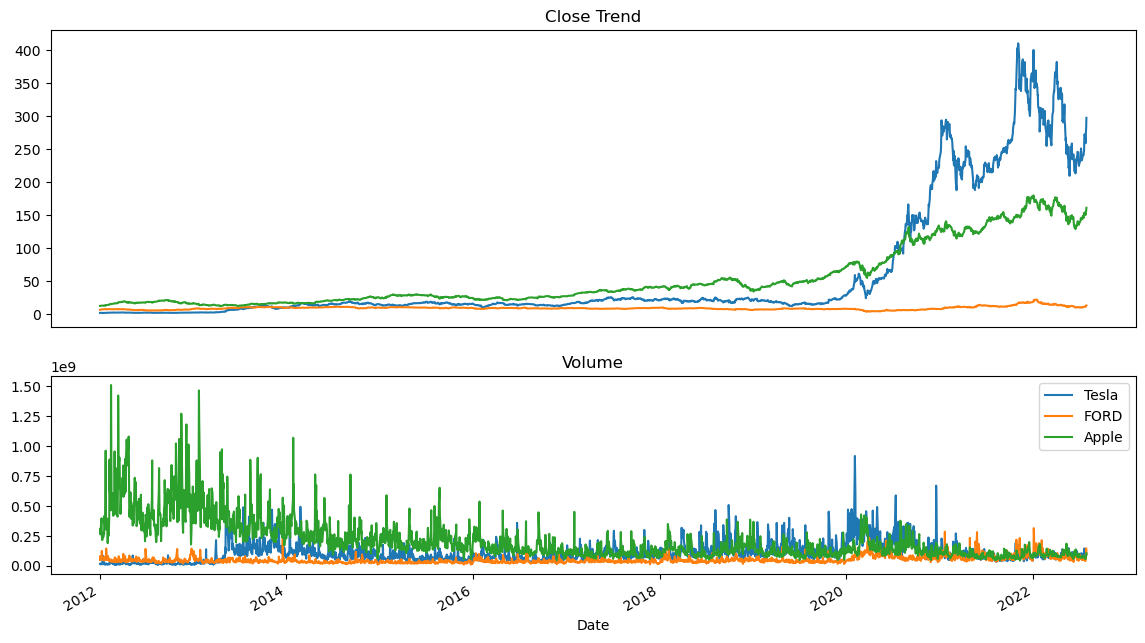

In [6]:
from matplotlib import gridspec

fig= plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 2]) 
axes = []
axes.append(plt.subplot(gs[0]))
axes.append(plt.subplot(gs[1]))
axes[0].get_xaxis().set_visible(False)

tesla['Close'].plot(ax=axes[0], label='Tesla', 
                    figsize=(14, 8), title="Close Trend")
ford['Close'].plot(ax=axes[0], label='FORD')
apple['Close'].plot(ax=axes[0], label='Apple')
tesla['Volume'].plot(ax=axes[1], label='Tesla', 
                     figsize=(14, 8), title="Volume")
ford['Volume'].plot(ax=axes[1], label='FORD')
apple['Volume'].plot(ax=axes[1], label='Apple')
plt.legend();

**최대 거래량 발생 일자**

In [8]:
tesla['Volume'].idxmax().date(), apple['Volume'].idxmax().date()

(datetime.date(2020, 2, 4), datetime.date(2012, 2, 15))

## Log Close Price
- 서로 scale 이 다른 주가에 대한 실제 변화율을 시각화 하기 위해 price 의 log 를 취함

In [9]:
tesla.head()

,Close,Volume
Date,,
2012-01-03 00:00:00-05:00,1.872000,13921500
2012-01-04 00:00:00-05:00,1.847333,9451500
2012-01-05 00:00:00-05:00,1.808000,15082500
2012-01-06 00:00:00-05:00,1.794000,14794500
2012-01-09 00:00:00-05:00,1.816667,13455000


In [10]:
tesla['log close'] = np.log(tesla['Close'])
ford['log close'] = np.log(ford['Close'])
apple['log close'] = np.log(apple['Close'])

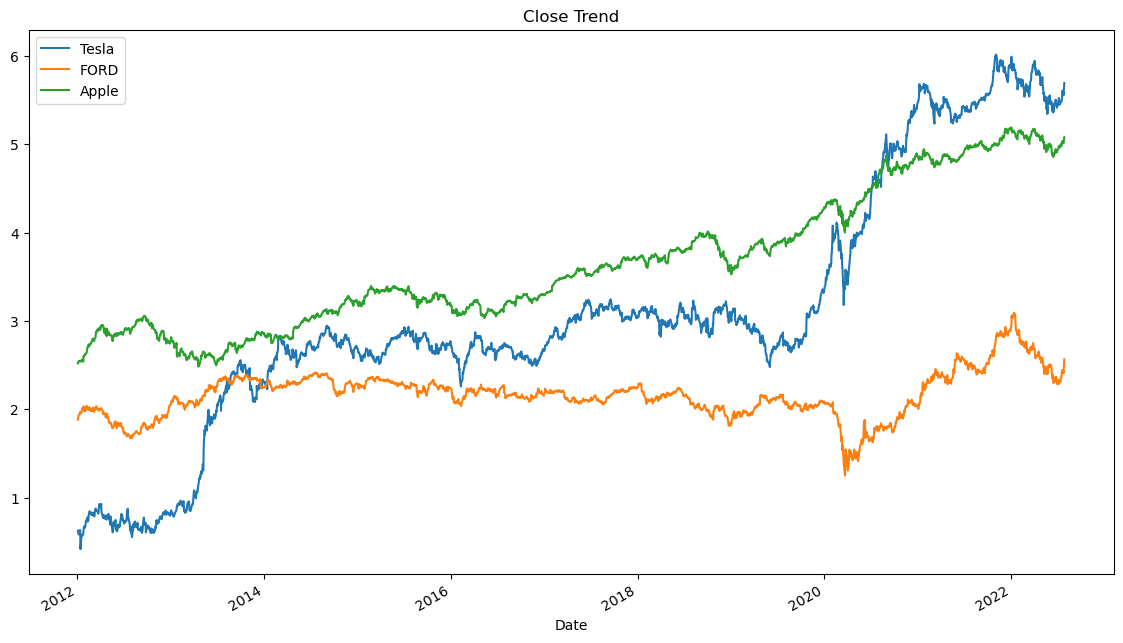

In [15]:
tesla['log close'].plot(label='Tesla', figsize=(14, 8), title="Close Trend")
ford['log close'].plot(label='FORD')
apple['log close'].plot(label='Apple')
plt.legend()

## Normalized Price

- 시초가를 1 로 맞추어 놓고 변화된 상대 가격 비교

In [17]:
tesla['norm close'] = tesla['Close'] / tesla['Close'][0]
apple['norm close'] = apple['Close'] / apple['Close'][0]
ford['norm close'] = ford['Close'] / ford['Close'][0]

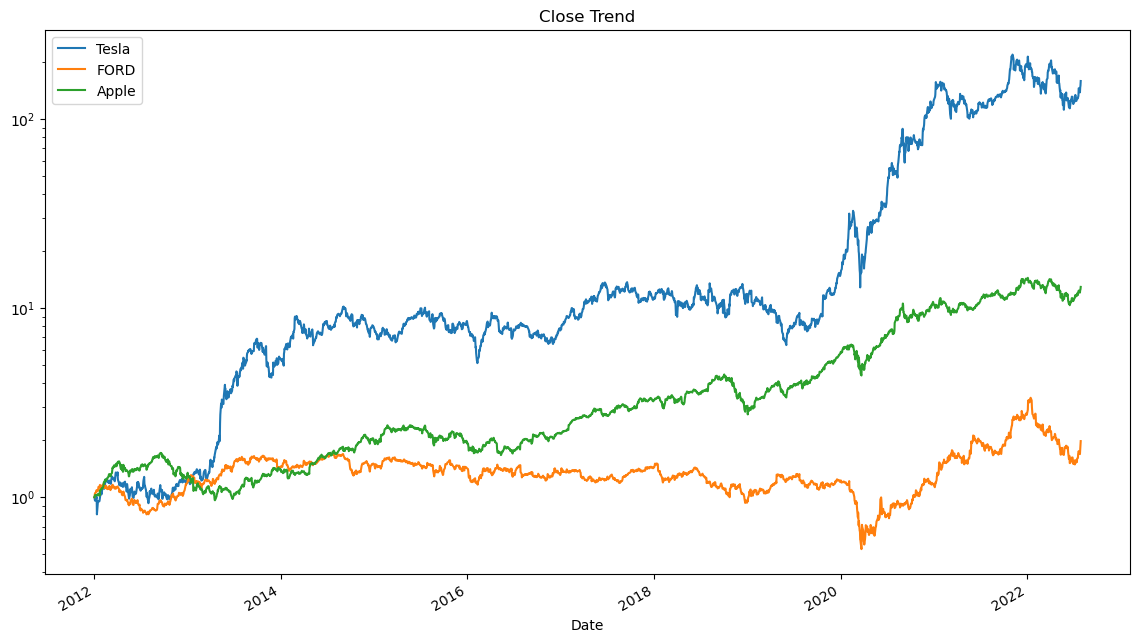

In [20]:
tesla['norm close'].plot(label='Tesla', figsize=(14, 8), title="Close Trend")
ford['norm close'].plot(label='FORD')
apple['norm close'].plot(label='Apple')
plt.yscale('log')   # 금액 크기를 로그로 변경
plt.legend()

## 주식 종목간의 correlation 분석

- Tesla 주식이  Apple 과 관련 있는지, GM 과 관련 있는지 분석

In [21]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='TESLA', ylabel='TESLA'>,
        <Axes: xlabel='FORD', ylabel='TESLA'>,
        <Axes: xlabel='APPLE', ylabel='TESLA'>],
       [<Axes: xlabel='TESLA', ylabel='FORD'>,
        <Axes: xlabel='FORD', ylabel='FORD'>,
        <Axes: xlabel='APPLE', ylabel='FORD'>],
       [<Axes: xlabel='TESLA', ylabel='APPLE'>,
        <Axes: xlabel='FORD', ylabel='APPLE'>,
        <Axes: xlabel='APPLE', ylabel='APPLE'>]], dtype=object)

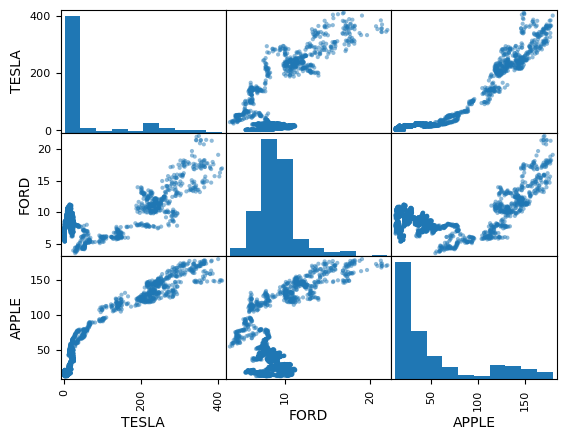

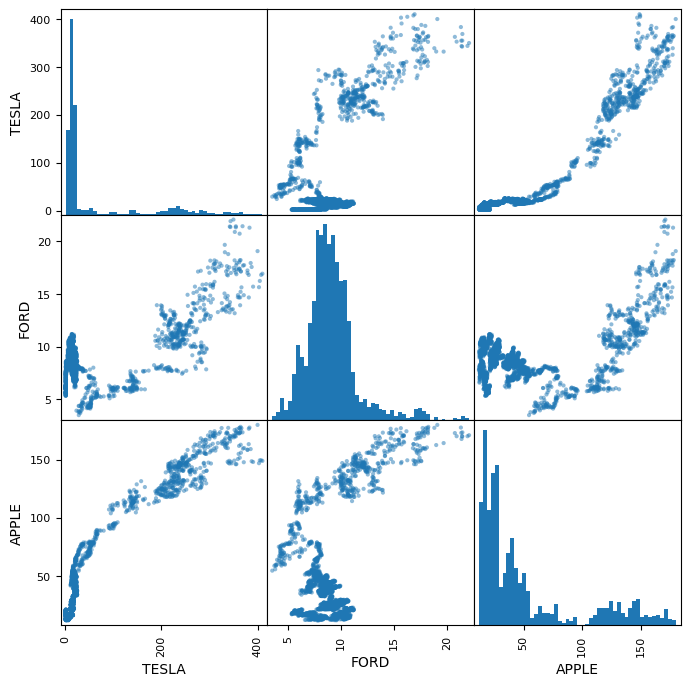

In [29]:
df = pd.concat([tesla['Close'], ford['Close'], apple['Close']], axis=1)
df.columns = ['TESLA', 'FORD', 'APPLE']
scatter_matrix(df)
scatter_matrix(df, figsize=(8, 8), hist_kwds = {'bins': 50})   # 기업 간의 관계 -> 선형 관계를 보일 수록 비슷한 기업임!

In [31]:
df.corr()   # 상관관계 : 높을 수록 비슷하게 감

,TESLA,FORD,APPLE
TESLA,1.000000,0.645409,0.951569
FORD,0.645409,1.000000,0.495228
APPLE,0.951569,0.495228,1.000000


## 일일 수익율 (Daily Percentage Change)

- 주식을 구입하고 다음 날 팔았을 때의 이득 (손실)

- 주식의 변동성 분석에 유용

- 일일 수익율의 분포가 넓으면 변동성 큼

$r_t = \frac{P_t}{P_{t-1}} - 1$ 

$수익(율) = \frac{당일가격}{전일가격} - 1$

```
tesla['return'] = tesla['Close'] / tesla['Close'].shift(1) - 1
tesla['return'] = tesla['Close'].pct_change(1)  
```

- histogram 으로 얼마나 넓게 분포하는지 check

In [34]:
tesla['return'] = tesla['Close'] / tesla['Close'].shift(1) - 1
ford['return'] = ford['Close'].pct_change(1)
apple['return'] = apple['Close'].pct_change(1)

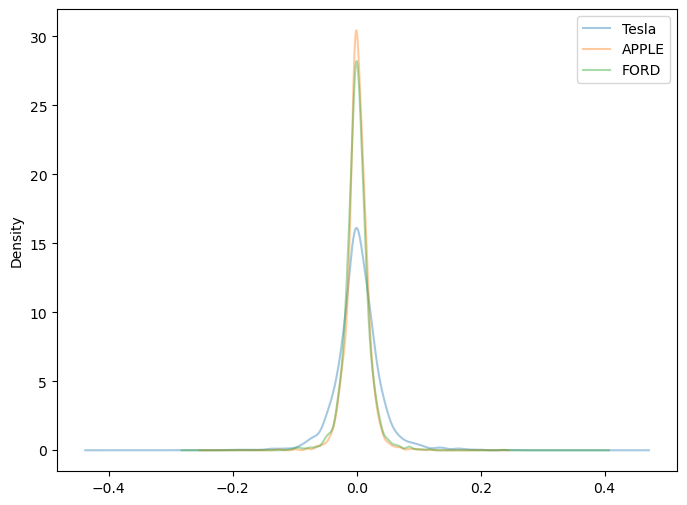

In [36]:
tesla['return'].plot(kind='kde', label='Tesla', alpha=0.4, figsize=(8,6))
apple['return'].plot(kind='kde', label='APPLE', alpha=0.4)
ford['return'].plot(kind='kde', label='FORD', alpha=0.4)
plt.legend()

<Axes: >

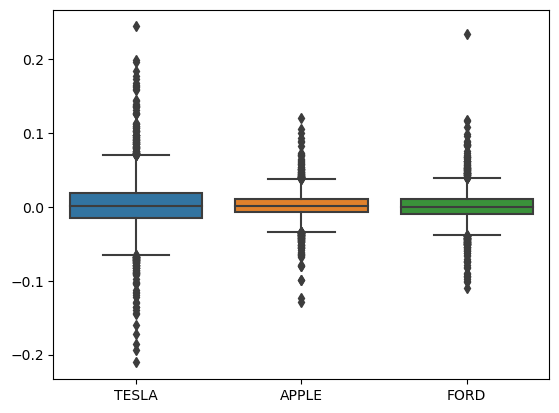

In [38]:
# Box plot
# seaborn : matplot + 통계, 시각적으로 더 유용함
import seaborn as sns

df= pd.concat([tesla['return'], apple['return'], ford['return']], axis=1)
df.columns = ['TESLA', 'APPLE', 'FORD']
sns.boxplot(data=df)

## 누적일일수익률 (Cumulative Daily Returns)

- 1 불을 투자했을 때 누적적으로 가장 수익이 많이 났을 주식 파악

$i_t = (1+r_t) * i_{t-1}$  


$누적수익률 = (1 + 당일수익률) * 전일자 누적수익률$

In [41]:
tesla['cum ret'] = (1 + tesla['return']).cumprod()
apple['cum ret'] = (1 + apple['return']).cumprod()
ford['cum ret'] = (1 + ford['return']).cumprod()

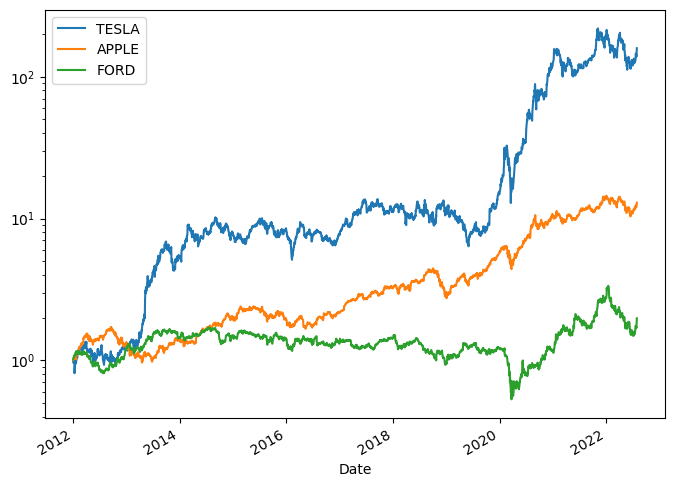

In [43]:
tesla['cum ret'].plot(label='TESLA', figsize=(8, 6))
apple['cum ret'].plot(label='APPLE', figsize=(8, 6))
ford['cum ret'].plot(label='FORD', figsize=(8, 6))
plt.legend()
plt.yscale('log')

In [44]:
tesla.iloc[[0, -1]]

,Close,Volume,log close,norm close,return,cum ret
Date,,,,,,
2012-01-03 00:00:00-05:00,1.872000,13921500,0.627007,1.000000,NaN,NaN
2022-07-29 00:00:00-04:00,297.149994,95313000,5.694237,158.733973,0.05785,158.733973


In [45]:
ford.iloc[[0, -1]]

,Close,Volume,log close,norm close,return,cum ret
Date,,,,,,
2012-01-03 00:00:00-05:00,6.579116,45709900,1.883900,1.000000,NaN,NaN
2022-07-29 00:00:00-04:00,13.026672,94551600,2.566999,1.980003,0.049286,1.980003


In [46]:
apple.iloc[[0, -1]]

,Close,Volume,log close,norm close,return,cum ret
Date,,,,,,
2012-01-03 00:00:00-05:00,12.433823,302220800,2.520420,1.000000,NaN,NaN
2022-07-29 00:00:00-04:00,160.909912,101786900,5.080845,12.941307,0.032793,12.941307
